#**Ejercicio semana 4 - Procesamiento de imágenes**

In [ ]:
#Librerías
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#cambiar el color de fondo de la imagen


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


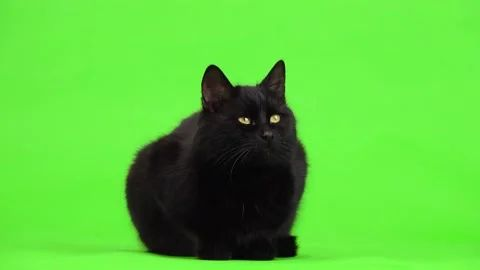

In [ ]:
import cv2
import numpy as np

# Leer la imagen
im = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /cat.jpg')
# Mostrar la imagen
cv2_imshow(im)



array([[228, 228, 228, ..., 240, 240, 240],
       [228, 228, 228, ..., 240, 240, 240],
       [228, 228, 228, ..., 240, 240, 240],
       ...,
       [240, 241, 241, ..., 247, 247, 247],
       [240, 241, 241, ..., 247, 247, 247],
       [240, 241, 241, ..., 248, 247, 247]], dtype=uint8)
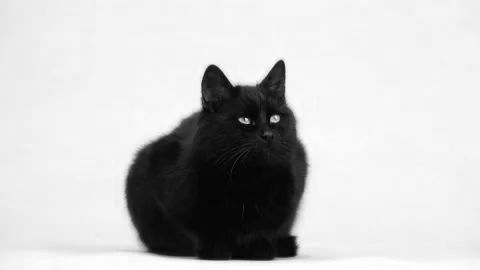

In [ ]:
# El orden de los canales es: BGR
im = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /cat.jpg')
green = im[:,:,1]
green

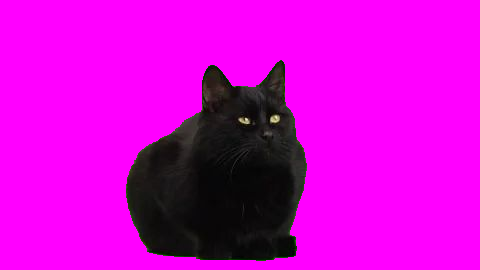

In [ ]:
import numpy as np
import cv2

# Lee la imagen
image = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /cat.jpg')

# Crea una máscara del fondo verde
lower_bound = np.array([0, 100, 0])
upper_bound = np.array([130, 255, 220])
mask = cv2.inRange(image, lower_bound, upper_bound)

# Aplica una operación morfológica de apertura para eliminar pequeños puntos verdes
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Crea una imagen de fondo morado del mismo tamaño que la imagen original
purple_background = np.ones_like(image) * [255, 0, 255]

# Copia el fondo morado en la imagen original donde la máscara es negra
result = np.where(mask[:, :, None] == 0, image, purple_background)

# Muestra la imagen resultante
cv2_imshow(result)



#Brillo y contraste

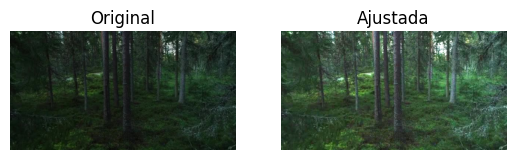

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Leer la imagen
image = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /bosuqe.jpg')

# Ajustar el brillo y contraste
alpha = 1.8  # Factor de contraste
beta = 10  # Valor de brillo

adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


# Mostrar la imagen original y la imagen ajustada
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB)), plt.title('Ajustada')
plt.axis('off')
plt.show()


#Image Matting

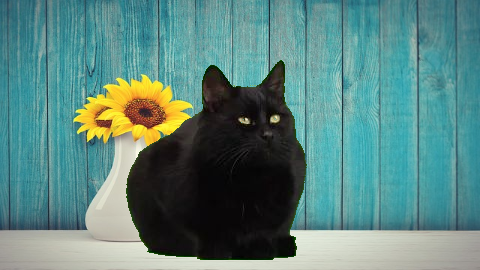

In [ ]:
 #Lee la imagen del gato y del nuevo fondo
img_cat = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /cat.jpg')
img_background = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /fondo 2.jpg')

# Asegúrate de que ambas imágenes tengan las mismas dimensiones
img_background = cv2.resize(img_background, (img_cat.shape[1], img_cat.shape[0]))

# Define el rango de colores de verde en HSV
lower_green = np.array([10, 110, 90])
upper_green = np.array([90, 255, 255])

# Convierte la imagen del gato a HSV
hsv = cv2.cvtColor(img_cat, cv2.COLOR_BGR2HSV)

# Crea una máscara para el color verde
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invierte la máscara
mask_inv = cv2.bitwise_not(mask)

# Aplica la máscara a la imagen del gato
img_cat_fg = cv2.bitwise_and(img_cat, img_cat, mask=mask_inv)

# Aplica la máscara inversa al fondo
img_background_fg = cv2.bitwise_and(img_background, img_background, mask=mask)

# Fusiona el gato con el nuevo fondo
result = cv2.add(img_cat_fg, img_background_fg)

# # Muestra el resultado
# from IPython.display import Image, display
# display(Image('resultado.jpg'))

cv2_imshow(result)


#Sobel

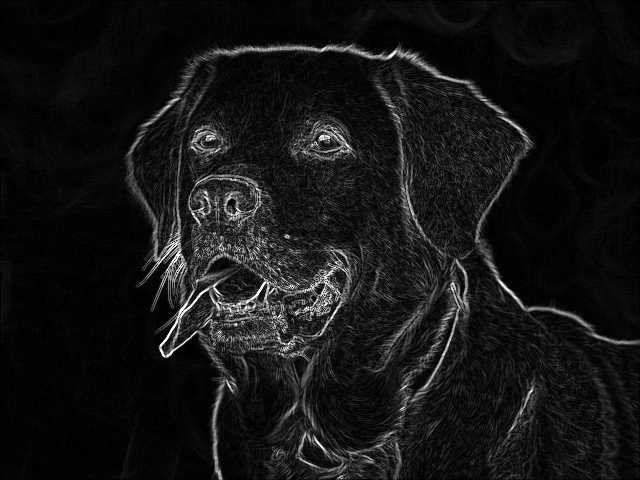

In [ ]:
#Librerías
import cv2
import numpy as np

# Leer la imagen en escala de grises
image = cv2.imread('/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /perro.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el operador Sobel en las direcciones x e y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combinar las imágenes resultantes
sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)

# Mostrar la imagen combinada
cv2_imshow(sobel_combined)